# Experiments

## 0.

In [4]:
# %reload_ext autoreload
# %autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
import networkx as nx

import sys
sys.path.append('./src') ##

from sketching import Svdr
from experiment import Experiment

# import matplotlib_inline
# %matplotlib inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

In [5]:
%%bash
lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               142
Model name:          Intel(R) Core(TM) i3-8130U CPU @ 2.20GHz
Stepping:            10
CPU MHz:             2207.998
BogoMIPS:            4415.99
Virtualization:      VT-x
Hypervisor vendor:   Microsoft
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            4096K
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology cpuid pni pclmulqdq vmx ssse3 fma cx16 pcid sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single pti ssbd ibrs ibpb stibp tpr_sh

## 1. Hyperspectral Images (HSIs)

### 1.1. Pavia City Center
https://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes

shape: (102, 1096, 715)
min_elem: 0.0
max_elem: 8000.0


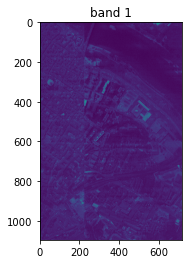

In [36]:
# original image

HSI_path = 'data/Pavia.mat'
HSI_mat = spio.loadmat(HSI_path)
HSI_data = HSI_mat['pavia']
HSI_data = np.moveaxis(HSI_data, -1, 0)

img = HSI_data

print('shape: %s\nmin_elem: %.1f\nmax_elem: %.1f' % (img.shape, img.min(), img.max()))
band = 1
plt.imshow(img[band])
plt.title(f'band {band}')
plt.show()

shape: (102, 300, 300)
min_elem: 0.0
max_elem: 1.0


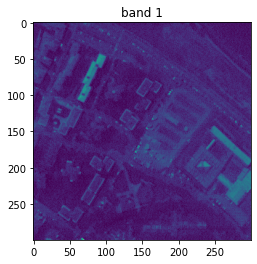

In [37]:
# subimage

HSI_path = 'data/Pavia.mat'
HSI_mat = spio.loadmat(HSI_path)
HSI_data = HSI_mat['pavia']
HSI_data = np.moveaxis(HSI_data, -1, 0) / HSI_data.max()

img = HSI_data[:, 250:250+300, 250:250+300]

print('shape: %s\nmin_elem: %.1f\nmax_elem: %.1f' % (img.shape, img.min(), img.max()))
band = 1
plt.imshow(img[band])
plt.title(f'band {band}')
plt.show()

In [38]:
svdrList = []
svdrList.append(Svdr('SVD'))
svdrList.append(Svdr('HMT',   p=1,   k=70,  distr='normal'))
svdrList.append(Svdr('HMT',   p=0,   k=70,  distr='rademacher', rho=0.2))
svdrList.append(Svdr('Tropp', k=75,  l=110, distr='normal'))
svdrList.append(Svdr('Tropp', k=70,  l=100, distr='rademacher', rho=0.2))
svdrList.append(Svdr('GN',    l=150,        distr='normal'))
svdrList.append(Svdr('GN',    l=150,        distr='rademacher', rho=0.2))

In [39]:
hoRanks = [60, 60, 60]
ttRanks = [54, 54]
itersNum = 100

ex = Experiment(img, svdrList)
ex.setRanks(hoRanks=hoRanks, ttRanks=ttRanks)

In [40]:
ex.runInitialSvd(ttsvd=True, hosvd=True)

Initial TT-SVD
---------------------------------------
time (s.)                   |   3.84831
negative elements (fro)     |   9.22459
negative elements (che)     |   0.08874
negative elements (density) |   0.03334
relative error (fro)        |   0.16742
relative error (che)        |   0.57698
r2_score                    |   0.92477
compression                 |     10.24
---------------------------------------
Initial HOSVD
---------------------------------------
time (s.)                   |   2.68770
negative elements (fro)     |  10.57919
negative elements (che)     |   0.09516
negative elements (density) |   0.03547
relative error (fro)        |   0.17583
relative error (che)        |   0.58652
r2_score                    |   0.91702
compression                 |     35.56
---------------------------------------


In [41]:
ex.run(ttsvd=True, hosvd=True, itersNum=100)

TT-SVD
-----------------------------------
SVD                     | 229.03 s.
HMT(1,70), N(0,1)       | 281.29 s.
HMT(0,70), Rad(0.2)     | 227.89 s.
Tropp(75,110), N(0,1)   | 227.58 s.
Tropp(70,100), Rad(0.2) | 180.60 s.
GN(150), N(0,1)         | 147.34 s.
GN(150), Rad(0.2)       | 113.07 s.
-----------------------------------
HOSVD
-----------------------------------
SVD                     | 298.26 s.
HMT(1,70), N(0,1)       | 241.21 s.
HMT(0,70), Rad(0.2)     | 172.96 s.
Tropp(75,110), N(0,1)   | 226.61 s.
Tropp(70,100), Rad(0.2) | 195.95 s.
GN(150), N(0,1)         | 122.56 s.
GN(150), Rad(0.2)       |  96.00 s.
-----------------------------------


In [42]:
ex.timeit(ttsvd=True, hosvd=True, itersNum=100)

TT-SVD
-----------------------------------
SVD                     | 233.09 s.
HMT(1,70), N(0,1)       | 231.90 s.
HMT(0,70), Rad(0.2)     | 153.39 s.
Tropp(75,110), N(0,1)   | 221.61 s.
Tropp(70,100), Rad(0.2) | 156.04 s.
GN(150), N(0,1)         | 101.44 s.
GN(150), Rad(0.2)       |  86.56 s.
-----------------------------------
HOSVD
-----------------------------------
SVD                     | 225.67 s.
HMT(1,70), N(0,1)       | 243.01 s.
HMT(0,70), Rad(0.2)     | 167.48 s.
Tropp(75,110), N(0,1)   | 199.10 s.
Tropp(70,100), Rad(0.2) | 153.72 s.
GN(150), N(0,1)         | 138.79 s.
GN(150), Rad(0.2)       |  84.92 s.
-----------------------------------


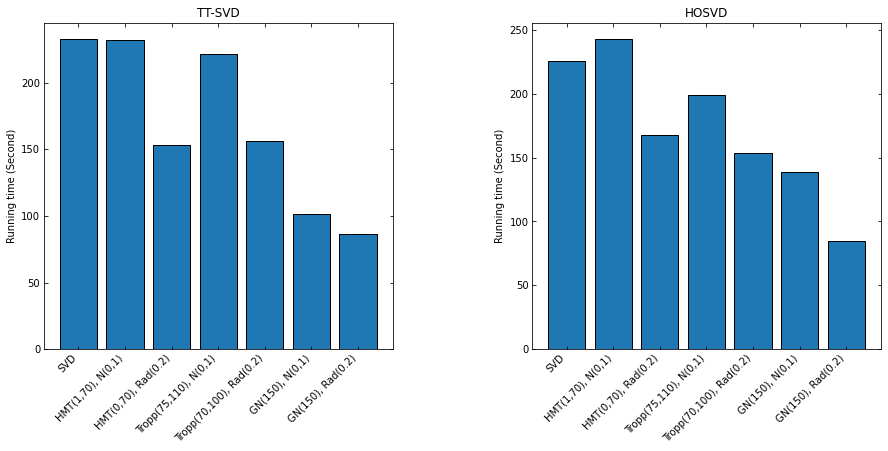

In [43]:
fig, ax = ex.plotRuntimes(ttsvd=True, hosvd=True, figsize=(15,6), wspace=0.4)

In [44]:
fig0, ax0 = fig, ax ###

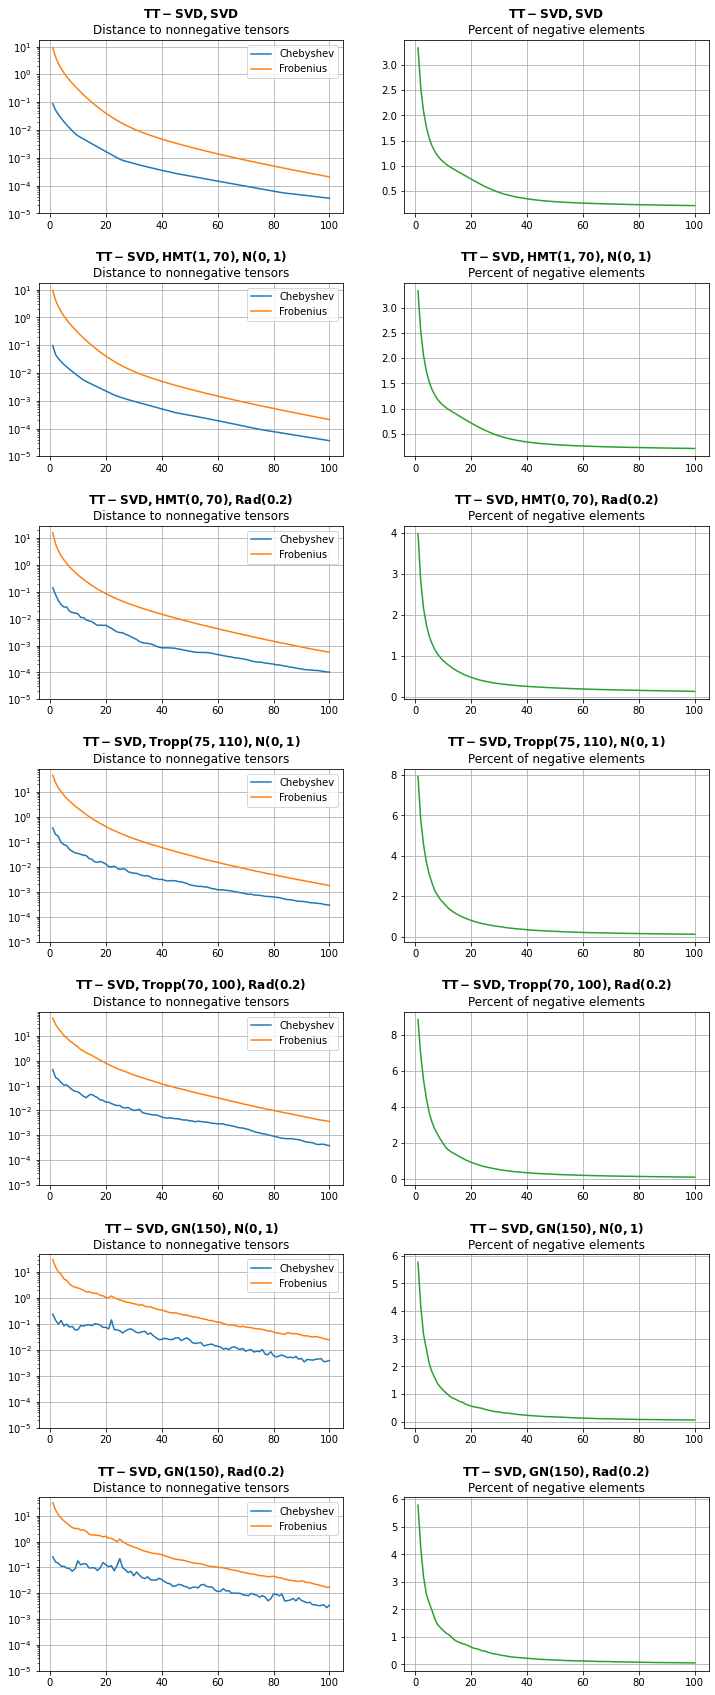

In [45]:
fig, ax = ex.plotConvergence(hosvd=False, figsize=(12, 30))

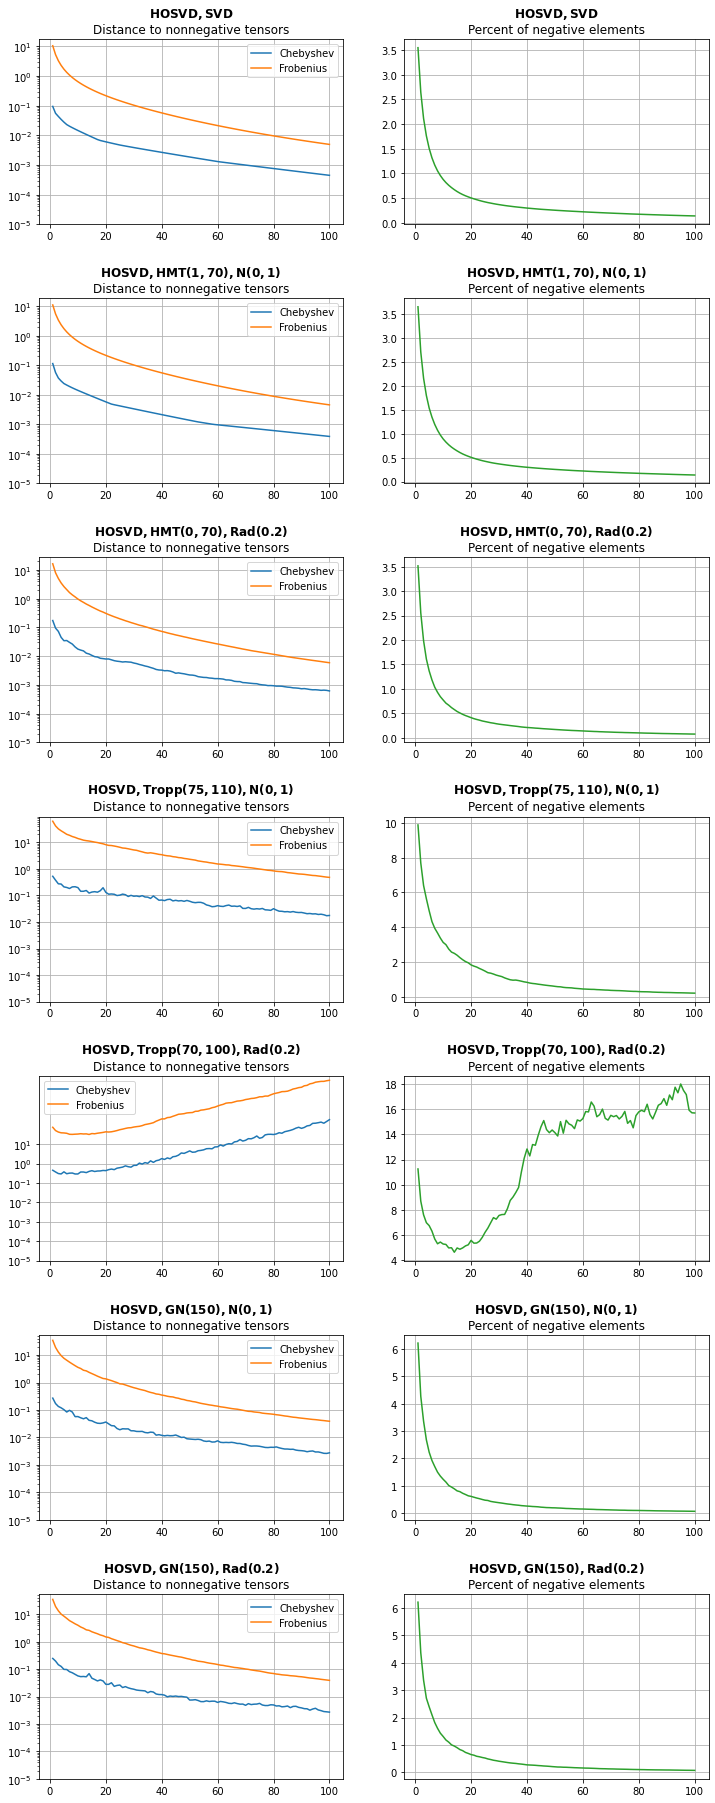

In [46]:
fig, ax = ex.plotConvergence(ttsvd=False)

In [47]:
ex.printErrors()

| TT-SVD                  | relative error (fro) | relative error (che) | r2_score |
------------------------------------------------------------------------------------
| SVD                     |              0.16917 |              0.59446 | 0.923190 |
| HMT(1,70), N(0,1)       |              0.17348 |              0.59563 | 0.919225 |
| HMT(0,70), Rad(0.2)     |              0.23057 |              0.65978 | 0.857319 |
| Tropp(75,110), N(0,1)   |              0.36990 |              0.76104 | 0.632759 |
| Tropp(70,100), Rad(0.2) |              0.41760 |              0.74411 | 0.531937 |
| GN(150), N(0,1)         |              0.33820 |              0.77177 | 0.693018 |
| GN(150), Rad(0.2)       |              0.34448 |              0.93037 | 0.681506 |
------------------------------------------------------------------------------------
| HOSVD                   | relative error (fro) | relative error (che) | r2_score |
-----------------------------------------------------------------

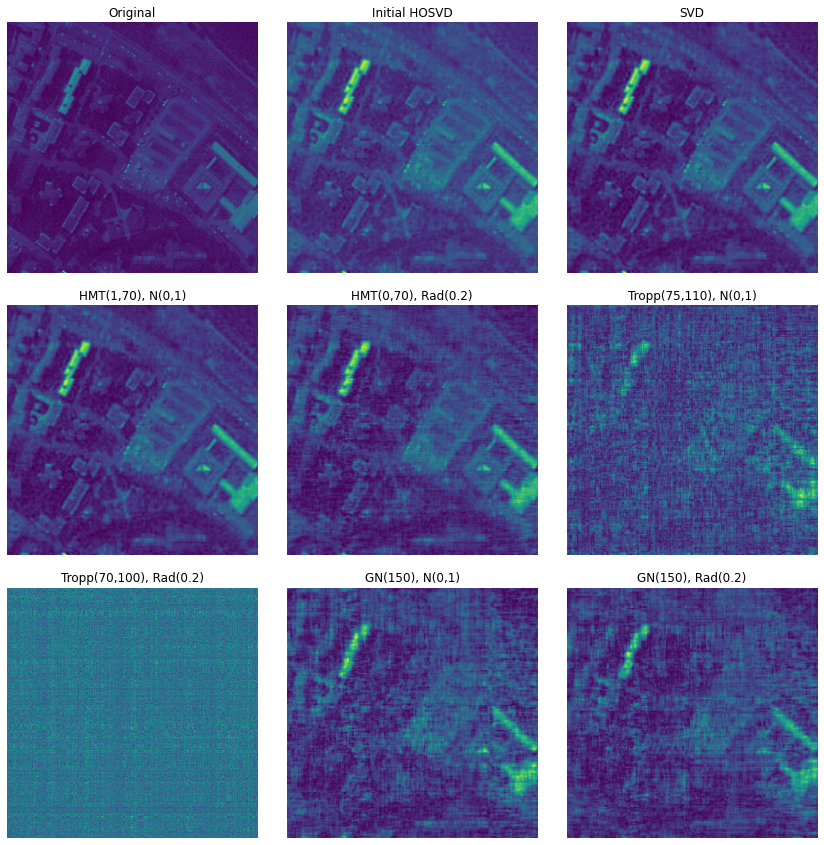

In [48]:
## HOSVD

fig, ax = ex.showApproximations(ttsvd=False)

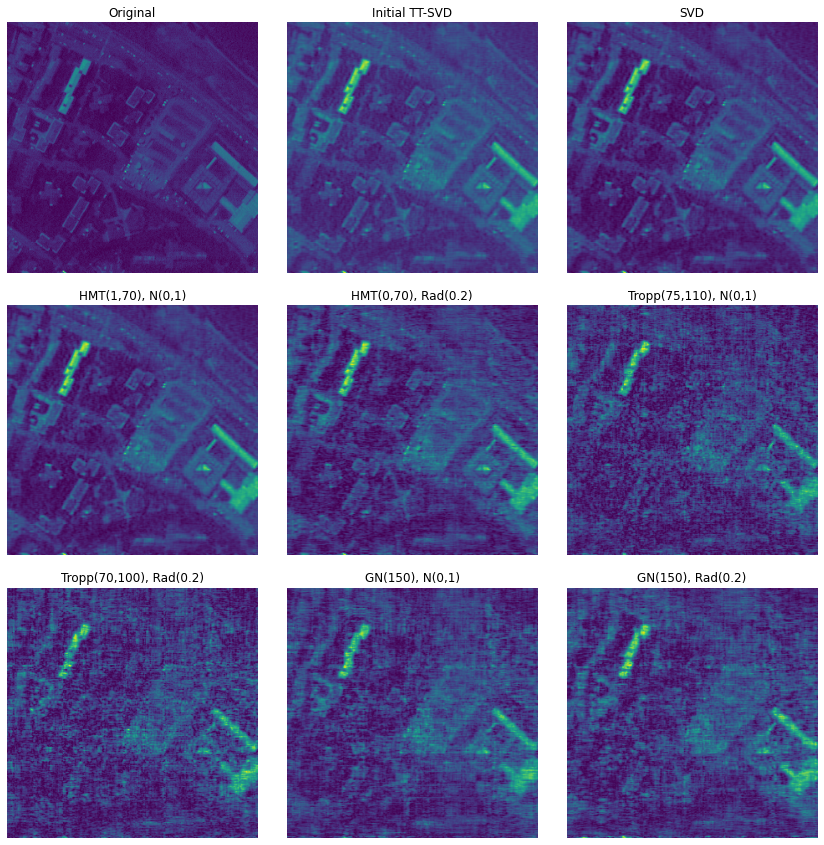

In [49]:
## TT-SVD

fig, ax = ex.showApproximations(hosvd=False)

### 1.2. Washington, DC
https://github.com/JakobSig/HSI2RGB/blob/master/washington_hsi.mat

shape: (191, 307, 307)
min_elem: 0.0
max_elem: 1.0


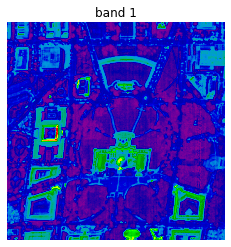

In [50]:
HSI_path = 'data/washington_hsi.mat'
HSI_mat = spio.loadmat(HSI_path)
HSI_data = HSI_mat['Y']
HSI_data = np.moveaxis(HSI_data, -1, 0)
img = HSI_data / HSI_data.max()

print('shape: %s\nmin_elem: %.1f\nmax_elem: %.1f' % (img.shape, img.min(), img.max()))
band = 1
plt.imshow(img[band], cmap='nipy_spectral')
plt.title(f'band {band}')
plt.axis('off')
plt.show()

In [51]:
svdrList = []
svdrList.append(Svdr('SVD'))
svdrList.append(Svdr('HMT',   p=1,   k=70,  distr='normal'))
svdrList.append(Svdr('HMT',   p=0,   k=70,  distr='rademacher', rho=0.2))
svdrList.append(Svdr('Tropp', k=75,  l=110, distr='normal'))
svdrList.append(Svdr('Tropp', k=70,  l=100, distr='rademacher', rho=0.2))
svdrList.append(Svdr('GN',    l=150,        distr='normal'))
svdrList.append(Svdr('GN',    l=150,        distr='rademacher', rho=0.2))

In [52]:
hoRanks = [33, 40, 40]
ttRanks = [33, 33]
itersNum = 100

ex = Experiment(img, svdrList, hoRanks=hoRanks, ttRanks=ttRanks)

In [53]:
ex.runInitialSvd(ttsvd=True, hosvd=True)

Initial TT-SVD
---------------------------------------
time (s.)                   |  12.68995
negative elements (fro)     |   2.21814
negative elements (che)     |   0.06824
negative elements (density) |   0.03150
relative error (fro)        |   0.18146
relative error (che)        |   0.45327
r2_score                    |   0.94200
compression                 |     51.32
---------------------------------------
Initial HOSVD
---------------------------------------
time (s.)                   |   4.43244
negative elements (fro)     |   2.08144
negative elements (che)     |   0.07091
negative elements (density) |   0.02893
relative error (fro)        |   0.18450
relative error (che)        |   0.46223
r2_score                    |   0.94004
compression                 |    215.17
---------------------------------------


In [ ]:
ex.run(itersNum=itersNum)

TT-SVD
-----------------------------------
SVD                     | 437.17 s.
HMT(1,70), N(0,1)       | 247.73 s.
HMT(0,70), Rad(0.2)     | 193.31 s.
Tropp(75,110), N(0,1)   | 220.69 s.
Tropp(70,100), Rad(0.2) | 195.14 s.
GN(150), N(0,1)         |  98.69 s.
GN(150), Rad(0.2)       |  89.04 s.
-----------------------------------
HOSVD
-----------------------------------
SVD                     | 359.69 s.
HMT(1,70), N(0,1)       | 265.36 s.


In [ ]:
ex.timeit(itersNum=itersNum)

In [ ]:
_ = ex.plotConvergence(ttsvd=False)

In [ ]:
_ = ex.plotConvergence(hosvd=False)

In [ ]:
fig1, ax1 = ex.plotRuntimes()

In [ ]:
ex.printErrors()

In [ ]:
## HOSVD

fig, ax = ex.showApproximations(ttsvd=False)

In [ ]:
## TT-SVD

fig, ax = ex.showApproximations(hosvd=False)

## 2. Multidimensional Gaussian mixture

In [728]:
t0 = time()

N = 128
N1 = N
N2 = N-10
N3 = N+10
A = np.zeros([N1, N2,N3])
cov_mat = np.random.uniform(0, 1, [3,3])
cov_mat = cov_mat @ cov_mat.T
cov_mat = cov_mat / np.linalg.norm(cov_mat)
cov_mat2 = np.random.uniform(0, 1, [3,3])
cov_mat2 = cov_mat2 @ cov_mat2.T
cov_mat2 = cov_mat2 / np.linalg.norm(cov_mat2)

cov_mat3 = np.random.uniform(0, 1, [3,3])
cov_mat3 = cov_mat3 @ cov_mat3.T
cov_mat3 = cov_mat3 / np.linalg.norm(cov_mat3)

h = 4. / N
for i in range(N1):
    for j in range(N2):
        for k in range(N3):
            point = np.array([i*h, j*h, k*h])
            A[i,j,k] = np.exp(-point @ cov_mat  @ point) +\
                       np.exp(-point @ cov_mat2 @ point) +\
                       np.exp(-point @ cov_mat3 @ point)
            
print('%.2f s.' % (time() - t0))

53.81 s.


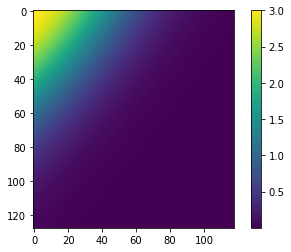

In [729]:
plt.imshow(A[:, :, 0])
plt.colorbar()

In [730]:
ho_ranks = (4, 5, 6)
tt_ranks = (4, 5)

SVDR(A, ho_ranks, tt_ranks)

---------------------------------------
HOSVD
---------------------------------------
time (s.)                   |   0.38503
negative elements (fro)     |   0.00898
negative elements (che)     |   0.00005
negative elements (density) |   0.26359
relative error (fro)        |   0.00012
relative error (che)        |   0.00056
---------------------------------------
TTSVD
---------------------------------------
time (s.)                   |   0.34553
negative elements (fro)     |   0.00900
negative elements (che)     |   0.00005
negative elements (density) |   0.20467
relative error (fro)        |   0.00012
relative error (che)        |   0.00057
---------------------------------------


In [731]:
params_hosvd = [dict(p=1,   k=70,  distr='normal'),\
                dict(p=0,   k=70,  distr='rademacher', rho=0.2),\
                dict(k=70,  l=100, distr='rademacher', rho=0.2),\
                dict(l=100,        distr='normal',     rho=0.2),\
                dict(l=150,        distr='rademacher', rho=0.2)]
params_ttsvd = [dict(p=1,   k=70,  distr='normal'),\
                dict(p=0,   k=70,  distr='rademacher', rho=0.2),\
                dict(k=70,  l=100, distr='normal',     rho=0.2),\
                dict(k=70,  l=100, distr='rademacher', rho=0.2),\
                dict(l=150,        distr='normal',     rho=0.2)]
algs_hosvd = [Svdr(SVD)]
algs_ttsvd = [Svdr(SVD)]
for i, alg in enumerate([HMT, HMT, Tropp, GN, GN]):
    algs_hosvd.append(Svdr(alg, **params_hosvd[i]))
for i, alg in enumerate([HMT, HMT, Tropp, Tropp, GN]):
    algs_ttsvd.append(Svdr(alg, **params_ttsvd[i]))

HMT(0,70), Rad(0.2)     | 111.05 s.


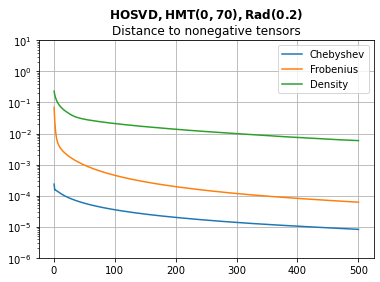

In [56]:
iters_num = 500
i = 2

mean_info = Info()
trials = 1

for _ in range(trials):
    info = Info()
    t0 = time()
    S, U_list = myHOSVD(a, ho_ranks, algs_hosvd[i], iters_num=iters_num, info=info)
    t1 = time()
    print('%-23s | %6.2f s.' % (algs_hosvd[i].get_name(), t1-t0))
    mean_info += info

mean_info /= trials

info_ = mean_info.get_info()
alg_name = mean_info.get_name()
plt.plot(range(1, iters_num+1), info_['chebyshev'], colors[0], label=norms[0])
plt.plot(range(1, iters_num+1), info_['frobenius'], colors[1], label=norms[1])
plt.plot(range(1, iters_num+1), info_['density'],   colors[2], label=norms[2])
plt.yscale('log')
plt.yticks(yticks)
plt.title('$\\bf{%s, %s}$\n%s' % ('HOSVD', alg_name, 'Distance to nonnegative tensors'))
plt.legend()
plt.grid()

### 2.1 $X_i = P_r(|X_{i-1}|) + min(X_{i-1})$

In [182]:
iters_num = 150

ar_info_list_hosvd = []
ar_info_list_ttsvd = []
ar_list_hosvd = []
ar_list_ttsvd = []
    
line = '-' * 35
print(line)
print('HOSVD')
print(line)
for i in range(len(algs_hosvd)):
    info = Info()
    t0 = time()
    S, U_list = myHOSVD2(a, ho_ranks, algs_hosvd[i], iters_num=iters_num, info=info)
    t1 = time()
    print('%-23s | %6.2f s.' % (algs_hosvd[i].get_name(), t1-t0))
    ar_list_hosvd.append(restore_tensor_hosvd(S, U_list))
    ar_info_list_hosvd.append(info)

print(line)
print('TT-SVD')
print(line)
for i in range(len(algs_ttsvd)):
    info = Info()
    t0 = time()
    G_list = myTTSVD2(a, tt_ranks, algs_ttsvd[i], iters_num=iters_num, info=info)
    t1 = time()
    print('%-23s | %6.2f s.' % (algs_ttsvd[i].get_name(), t1-t0))
    ar_list_ttsvd.append(restore_tensor_ttsvd(G_list))
    ar_info_list_ttsvd.append(info)
print(line)

-----------------------------------
HOSVD
-----------------------------------
SVD                     |  66.86 s.
HMT(1,70), N(0,1)       |  42.85 s.
HMT(0,70), Rad(0.2)     |  32.73 s.
Tropp(70,100), Rad(0.2) |  34.88 s.
GN(100), N(0,1)         |   9.40 s.
-----------------------------------
TT-SVD
-----------------------------------
SVD                     |  57.55 s.
HMT(1,70), N(0,1)       |  37.75 s.
HMT(0,70), Rad(0.2)     |  28.39 s.
Tropp(70,100), Rad(0.2) |  24.77 s.
GN(150), N(0,1)         |  10.95 s.
-----------------------------------


In [234]:
ar_info_list = [ar_info_list_hosvd, ar_info_list_ttsvd]
ar_list = [ar_list_hosvd, ar_list_ttsvd]
alg_names  = ['HOSVD', 'TT-SVD']
line = '-' * 73

for j in range(2):
    print(line)
    print('| %-23s | %s (fro) | %s (che) |' % (alg_names[j], 'relative error', 'relative error'))
    print(line)
    for i in range(len(ar_info_list_hosvd)):
        info = ar_info_list[j][i]
        ar = ar_list[j][i]
        fro = np.linalg.norm(a - ar) / np.linalg.norm(a)
        che = np.max(abs(a - ar)) / np.max(abs(a))
        print('| %-23s | %20.5f | %20.5f |' % (info.get_name(), fro, che))
print(line)

-------------------------------------------------------------------------
| HOSVD                   | relative error (fro) | relative error (che) |
-------------------------------------------------------------------------
| SVD                     |              0.00065 |              0.00162 |
| HMT(1,70), N(0,1)       |              0.00065 |              0.00162 |
| HMT(0,70), Rad(0.2)     |              0.00065 |              0.00162 |
| Tropp(70,100), Rad(0.2) |              0.00065 |              0.00162 |
| GN(100), N(0,1)         |              0.00261 |              0.00608 |
-------------------------------------------------------------------------
| TT-SVD                  | relative error (fro) | relative error (che) |
-------------------------------------------------------------------------
| SVD                     |              0.00529 |              0.01476 |
| HMT(1,70), N(0,1)       |              0.00529 |              0.01476 |
| HMT(0,70), Rad(0.2)     |           

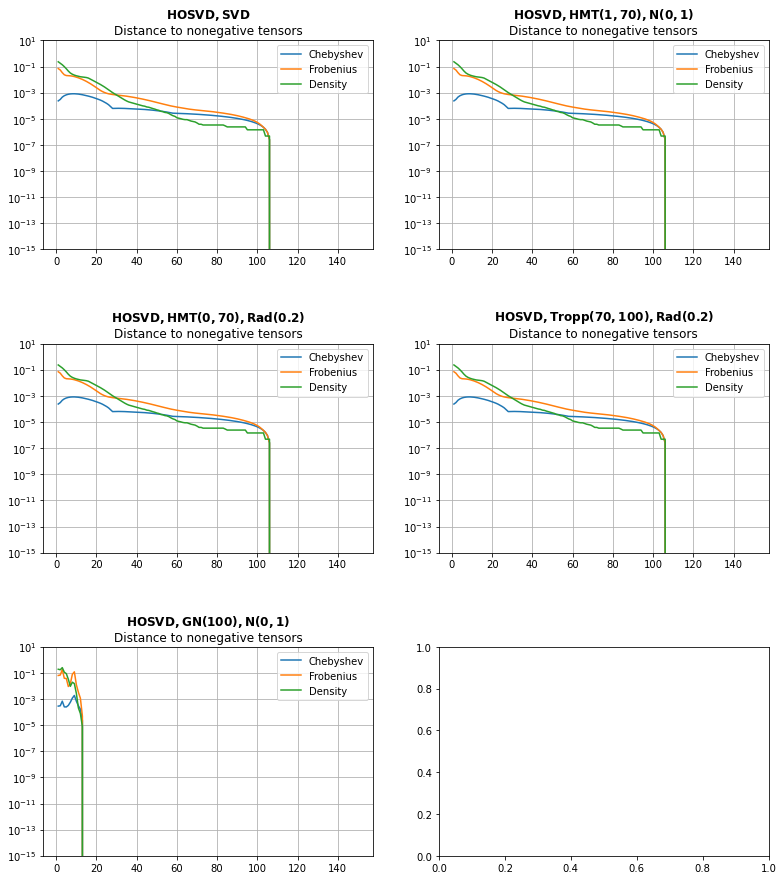

In [199]:
# HOSVD

title = 'Distance to nonnegative tensors'
info_list = ar_info_list_hosvd
fig, ax = plt.subplots(3, 2, figsize= (13, 15))   # (13, 60)

for k in range(len(info_list)):
    info = info_list[k].get_info()
    alg_name = info_list[k].get_name()
    i = k // 2
    j = k % 2
    ax[i,j].plot(range(1, iters_num+1), info['chebyshev'], colors[0], label=norms[0])
    ax[i,j].plot(range(1, iters_num+1), info['frobenius'], colors[1], label=norms[1])
    ax[i,j].plot(range(1, iters_num+1), info['density'],   colors[2], label=norms[2])
    ax[i,j].set_yscale('log')
    ax[i,j].set_yticks(yticks)
    ax[i,j].set_title('$\\bf{%s, %s}$\n%s' % ('HOSVD', alg_name, title))
    ax[i,j].legend()
    ax[i,j].grid()

plt.subplots_adjust(wspace=0.2, hspace=0.45)

In [200]:
# extent = ax[i,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# extent.x0 -= 0.5
# extent.x1 += 5.7
# extent.y1 += 9.0
# extent.y0 -= 0.3
# fname = 'hosvd.jpg'
# fig.savefig(fname, transparent=True, bbox_inches=extent)

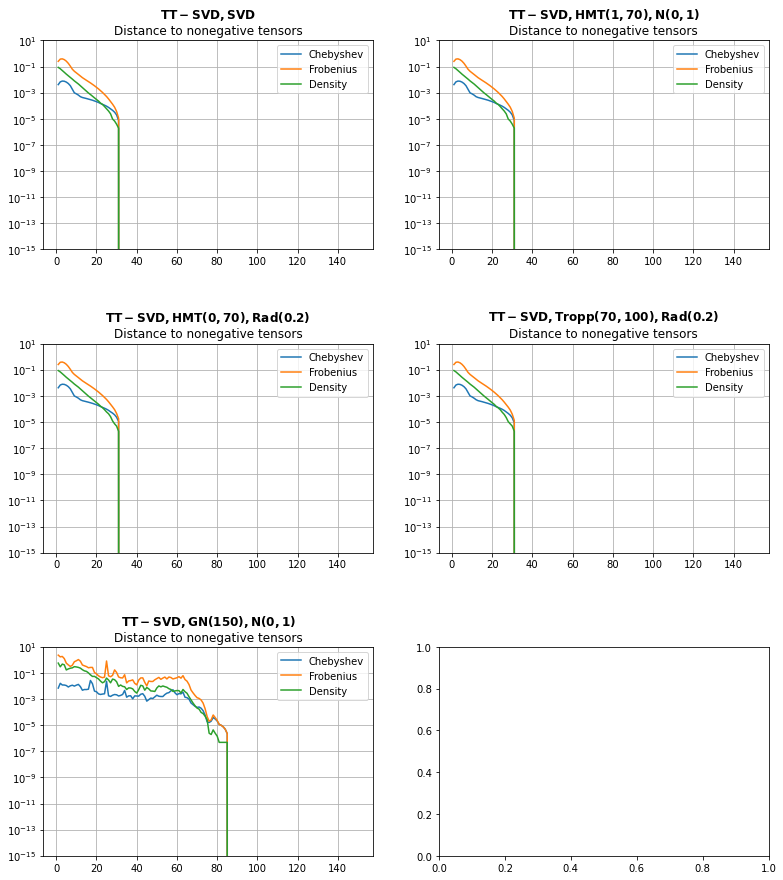

In [201]:
# TTSVD

title = 'Distance to nonnegative tensors'
info_list = ar_info_list_ttsvd
fig, ax = plt.subplots(3, 2, figsize= (13, 15))   # (13, 60)

for k in range(len(info_list)):
    info = info_list[k].get_info()
    alg_name = info_list[k].get_name()
    i = k // 2
    j = k % 2
    ax[i,j].plot(range(1, iters_num+1), info['chebyshev'], colors[0], label=norms[0])
    ax[i,j].plot(range(1, iters_num+1), info['frobenius'], colors[1], label=norms[1])
    ax[i,j].plot(range(1, iters_num+1), info['density'],   colors[2], label=norms[2])
    ax[i,j].set_yscale('log')
    ax[i,j].set_yticks(yticks)
    ax[i,j].set_title('$\\bf{%s, %s}$\n%s' % ('TT-SVD', alg_name, title))
    ax[i,j].legend()
    ax[i,j].grid()

plt.subplots_adjust(wspace=0.2, hspace=0.45)

In [202]:
# extent = ax[i,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# extent.x0 -= 0.5
# extent.x1 += 5.7
# extent.y1 += 9.0
# extent.y0 -= 0.3
# fname = 'ttsvd.jpg'
# fig.savefig(fname, transparent=True, bbox_inches=extent)

# 3. Stochastic cubical tensors

In [17]:
# graph generators

gilbert    = lambda n: nx.to_numpy_array(nx.binomial_graph(n, p=0.5, directed=False))
smallw     = lambda n: nx.to_numpy_array(nx.navigable_small_world_graph(int(n ** 0.5)))
geo        = lambda n: nx.to_numpy_array(nx.random_geometric_graph(n, radius=(1.44/n)**0.5, dim=2, p=2))
pref       = lambda n: nx.to_numpy_array(nx.barabasi_albert_graph(n, m=2))
rank1      = lambda n: np.ones((n, n))

# erdrey     = lambda n: nx.to_numpy_array(nx.erdos_renyi_graph(n, p=0.5, directed=True))
# lockandkey = lambda n:

g = [gilbert, smallw, geo, pref, rank1]

def get_stochatic_tensor(n, m): ## PageRank, Alg. 2
    P = np.zeros((n, n**(m-1)))
    for i in range(1, n**(m-2) + 1):
        gr = g[np.random.choice(range(len(g)))]
        P[:, (i-1)*n:i*n] = gr(n)
    col_sums = P.sum(axis=0)
    zero_cols = np.where(col_sums == 0)
    for col in zero_cols:
        row = np.random.choice(range(n))
        P[row, col] = 1
    col_sums[col_sums == 0] = 1
    P /= col_sums
    return fold(P, mode=0, shape=(n,)*m)

In [18]:
ho_ranks = [4, 5, 6]
tt_ranks = [4, 5]
a = get_stochatic_tensor(64, 3)

SVDR(a, ho_ranks, tt_ranks)

---------------------------------------
HOSVD
---------------------------------------
time (s.)                   |   0.02290
negative elements (fro)     |   1.12288
negative elements (che)     |   0.25079
negative elements (density) |   0.01075
relative error (fro)        |   0.94419
relative error (che)        |   0.98997
---------------------------------------
TTSVD
---------------------------------------
time (s.)                   |   0.02002
negative elements (fro)     |   1.25337
negative elements (che)     |   0.24807
negative elements (density) |   0.01152
relative error (fro)        |   0.94033
relative error (che)        |   0.99164
---------------------------------------


In [703]:
params_hosvd = [dict(p=1,   k=70,  distr='normal'),\
                dict(p=0,   k=70,  distr='rademacher', rho=0.2),\
                dict(k=70,  l=100, distr='rademacher', rho=0.2),\
                dict(l=100,        distr='normal',     rho=0.2),\
                dict(l=100,        distr='rademacher', rho=0.2)]
params_ttsvd = [dict(p=1,   k=70,  distr='normal'),\
                dict(p=0,   k=70,  distr='rademacher', rho=0.2),\
                dict(k=70,  l=100, distr='rademacher', rho=0.2),\
                dict(l=150,        distr='normal',     rho=0.2),\
                dict(l=100,        distr='rademacher', rho=0.2)]
algs_hosvd = [Svdr(SVD)]
algs_ttsvd = [Svdr(SVD)]
for i, alg in enumerate([HMT, HMT, Tropp, GN]):
    algs_hosvd.append(Svdr(alg, **params_hosvd[i]))
for i, alg in enumerate([HMT, HMT, Tropp, GN]):
    algs_ttsvd.append(Svdr(alg, **params_ttsvd[i]))

In [620]:
iters_num = 2000

ar_info_list_hosvd = []
ar_info_list_ttsvd = []
ar_list_hosvd = []
ar_list_ttsvd = []
    
line = '-' * 35
print(line)
print('HOSVD')
print(line)
for i in range(len(algs_hosvd)):
    info = Info()
    t0 = time()
    S, U_list = myHOSVD(a, ho_ranks, algs_hosvd[i], iters_num=iters_num, info=info)
    t1 = time()
    print('%-23s | %6.2f s.' % (algs_hosvd[i].get_name(), t1-t0))
    ar_list_hosvd.append(restore_tensor_hosvd(S, U_list))
    ar_info_list_hosvd.append(info)

print(line)
print('TT-SVD')
print(line)
for i in range(len(algs_ttsvd)):
    info = Info()
    t0 = time()
    G_list = myTTSVD(a, tt_ranks, algs_ttsvd[i], iters_num=iters_num, info=info)
    t1 = time()
    print('%-23s | %6.2f s.' % (algs_ttsvd[i].get_name(), t1-t0))
    ar_list_ttsvd.append(restore_tensor_ttsvd(G_list))
    ar_info_list_ttsvd.append(info)
print(line)

-----------------------------------
HOSVD
-----------------------------------
SVD                     |  78.66 s.
HMT(1,70), N(0,1)       | 144.05 s.
HMT(0,70), Rad(0.2)     | 142.78 s.
Tropp(70,100), Rad(0.2) | 113.36 s.
GN(100), N(0,1)         |  28.93 s.
-----------------------------------
TT-SVD
-----------------------------------
SVD                     |  58.21 s.
HMT(1,70), N(0,1)       | 177.11 s.
HMT(0,70), Rad(0.2)     | 106.75 s.
Tropp(70,100), Rad(0.2) | 105.41 s.
GN(150), N(0,1)         |  42.18 s.
-----------------------------------


In [621]:
ar_info_list = [ar_info_list_hosvd, ar_info_list_ttsvd]
ar_list = [ar_list_hosvd, ar_list_ttsvd]
alg_names  = ['HOSVD', 'TT-SVD']
line = '-' * 73

for j in range(2):
    print(line)
    print('| %-23s | %s (fro) | %s (che) |' % (alg_names[j], 'relative error', 'relative error'))
    print(line)
    for i in range(len(ar_info_list_hosvd)):
        info = ar_info_list[j][i]
        ar = ar_list[j][i]
        fro = np.linalg.norm(a - ar) / np.linalg.norm(a)
        che = np.max(abs(a - ar)) / np.max(abs(a))
        print('| %-23s | %20.5f | %20.5f |' % (info.get_name(), fro, che))
print(line)

-------------------------------------------------------------------------
| HOSVD                   | relative error (fro) | relative error (che) |
-------------------------------------------------------------------------
| SVD                     |              0.94799 |              0.99136 |
| HMT(1,70), N(0,1)       |              0.94799 |              0.99136 |
| HMT(0,70), Rad(0.2)     |              0.94799 |              0.99136 |
| Tropp(70,100), Rad(0.2) |              0.94799 |              0.99136 |
| GN(100), N(0,1)         |              0.98601 |              1.00000 |
-------------------------------------------------------------------------
| TT-SVD                  | relative error (fro) | relative error (che) |
-------------------------------------------------------------------------
| SVD                     |              0.94120 |              0.99175 |
| HMT(1,70), N(0,1)       |              0.94120 |              0.99175 |
| HMT(0,70), Rad(0.2)     |           

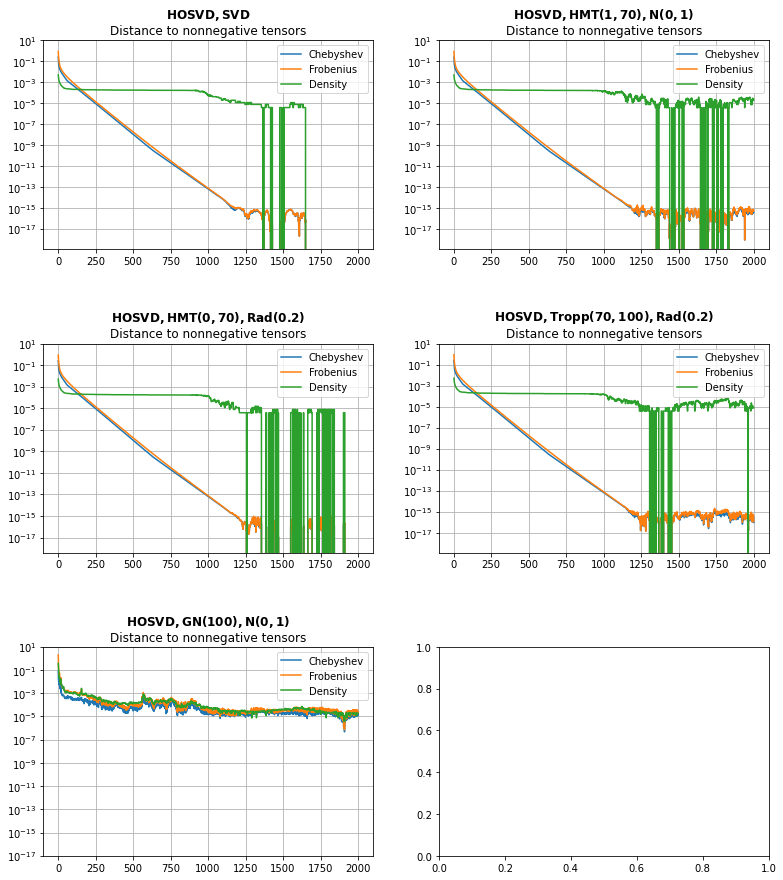

In [623]:
# HOSVD

title = 'Distance to nonnegative tensors'
info_list = ar_info_list_hosvd
fig, ax = plt.subplots(3, 2, figsize= (13, 15))   # (13, 60)

for k in range(len(info_list)):
    info = info_list[k].get_info()
    alg_name = info_list[k].get_name()
    i = k // 2
    j = k % 2
    ax[i,j].plot(range(1, iters_num+1), info['chebyshev'], colors[0], label=norms[0])
    ax[i,j].plot(range(1, iters_num+1), info['frobenius'], colors[1], label=norms[1])
    ax[i,j].plot(range(1, iters_num+1), info['density'],   colors[2], label=norms[2])
    ax[i,j].set_yscale('log')
    ax[i,j].set_yticks(yticks)
    ax[i,j].set_title('$\\bf{%s, %s}$\n%s' % ('HOSVD', alg_name, title))
    ax[i,j].legend()
    ax[i,j].grid()

plt.subplots_adjust(wspace=0.2, hspace=0.45)

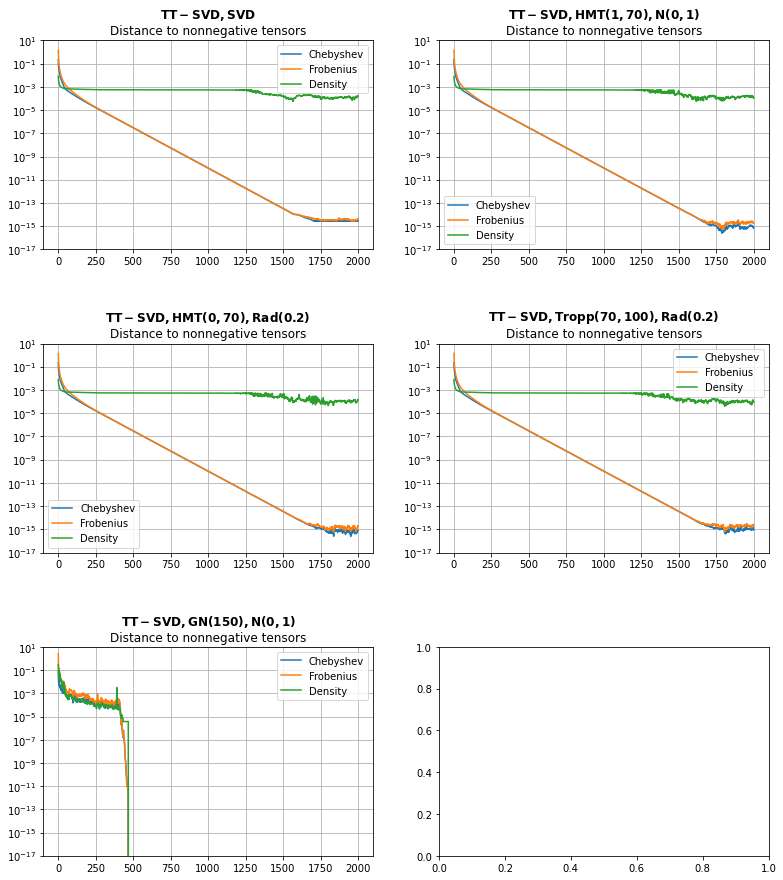

In [622]:
# TTSVD

title = 'Distance to nonnegative tensors'
info_list = ar_info_list_ttsvd
fig, ax = plt.subplots(3, 2, figsize= (13, 15))   # (13, 60)

for k in range(len(info_list)):
    info = info_list[k].get_info()
    alg_name = info_list[k].get_name()
    i = k // 2
    j = k % 2
    ax[i,j].plot(range(1, iters_num+1), info['chebyshev'], colors[0], label=norms[0])
    ax[i,j].plot(range(1, iters_num+1), info['frobenius'], colors[1], label=norms[1])
    ax[i,j].plot(range(1, iters_num+1), info['density'],   colors[2], label=norms[2])
    ax[i,j].set_yscale('log')
    ax[i,j].set_yticks(yticks)
    ax[i,j].set_title('$\\bf{%s, %s}$\n%s' % ('TT-SVD', alg_name, title))
    ax[i,j].legend()
    ax[i,j].grid()

plt.subplots_adjust(wspace=0.2, hspace=0.45)

In [14]:
r = 60 ######
ho_ranks = [r, r, r]
tt_ranks = [r, r]
a = get_stochatic_tensor(64, 3)

SVDR(a, ho_ranks, tt_ranks)

---------------------------------------
HOSVD
---------------------------------------
time (s.)                   |   0.05196
negative elements (fro)     |   3.10925
negative elements (che)     |   0.21703
negative elements (density) |   0.31722
relative error (fro)        |   0.24585
relative error (che)        |   0.48509
---------------------------------------
TTSVD
---------------------------------------
time (s.)                   |   0.02841
negative elements (fro)     |   3.10925
negative elements (che)     |   0.21703
negative elements (density) |   0.31722
relative error (fro)        |   0.24585
relative error (che)        |   0.48509
---------------------------------------


In [15]:
iters_num = 200

svdr = Svdr(GN, **dict(l=100, distr='rademacher', rho=0.2))
info = Info()

t0 = time()
G_list = myTTSVD(a, tt_ranks, svdr, iters_num=iters_num, info=info)
t1 = time()
print('%-23s | %6.2f s.' % (svdr.get_name(), t1-t0))

GN(100), Rad(0.2)       |   9.04 s.


In [16]:
np.linalg.norm(restore_tensor_ttsvd(G_list) - a) / np.linalg.norm(a)

0.9579033918788392

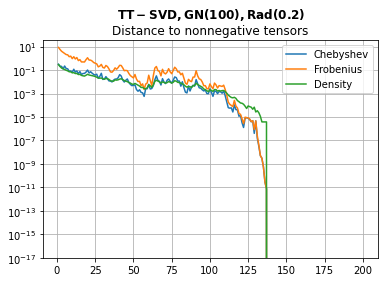

In [800]:
yticks = [10**(-x) for x in range(-1, 18, 2)]
plot_conv(info, title='TT-SVD')

### 3.1

In [801]:
def get_stochatic_tensor(shape):
    tensor = np.random.uniform(low=0.0, high=1.0, size=shape)
    mode_1 = unfold(tensor, mode=1)
    mode_1 = mode_1 / mode_1.sum(axis=0)
    return fold(mode_1, mode=1, shape=shape)

In [802]:
n = 128
shape = (n, n, n)
r = 10
ho_ranks = (r, r, r)
tt_ranks = (r, r)

a = get_stochatic_tensor(shape)

In [803]:
SVDR(a, ho_ranks, tt_ranks)

---------------------------------------
HOSVD
---------------------------------------
time (s.)                   |   0.46374
negative elements (fro)     |   0.00000
negative elements (che)     |   0.00000
negative elements (density) |   0.00000
relative error (fro)        |   0.49918
relative error (che)        |   0.57365
---------------------------------------
TTSVD
---------------------------------------
time (s.)                   |   0.40266
negative elements (fro)     |   0.00000
negative elements (che)     |   0.00000
negative elements (density) |   0.00000
relative error (fro)        |   0.49721
relative error (che)        |   0.58491
---------------------------------------
